#Data Analytics Project I: Analysis Airplane Crashes 1908-2019
This template is designed for the Women in AI (WAI) project May 2022 Cohort. The purpose of this project is to expose the WAI participants with a data analytic project related to aerospace and aviation. The objective of this project is to analyze, categorize and visualize airplane crash data. The goal of this project is to provide the paricipants with the tools and technqiues that are applicable to practical data analytics problems in aerospace and aviation. 






Learning Objectives: 
* Data visualization 
* Basic statistical analysis 
* Basic use of Python 
* Basic ML skills

Requirements/Pre-requisits: 
* STEM Background: No
* Data-science/ML/AI: Begginer / limited experience
* Python: Begginer - some experience prefered but not mandatory



Author of the template and mentor for this project: \
Katarina Vuckovic \
Systems Engineer and Data-Scientist at Collins Aerospace\
Contact: katarina.vuckovic@collins.com \

"Airplane Crashes Since 1908" dataset source: 
https://www.kaggle.com/cgurkan/airplane-crash-data-since-1908?select=Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv

Reference Links:
* https://github.com/mrefford/EE_551


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My\ Drive/Colab\ Notebooks

In [ ]:
from pathlib import Path

print(Path.cwd())  # /home/skovorodkin/stack

#Load Dataset

In [ ]:
# load dataset
import pandas as pd
import numpy as np
import time
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv')
df.shape

In [ ]:
#df.head()
df.tail(100)

In [ ]:
pd.set_option("display.max_colwidth", -1)
df.Summary.head(10)

Advanced exploratory data analysis (EDA) with Python: 
https://medium.com/p/536fa83c578a 

##Task 1 - Categorization and Visualization
###Task 1.1: Categorize by Operator (military, commertial(airline), test, sport...)
 * Define 5-7 categories (Example of categories: military, commertial(airline), test, sport...)
    * Q1: How many planes crashed per category? (sum number of crashes)
    * Q2: How many fatalities per category?     (sum number of fatalities)
    * Hint: make a new column in the dataset
 * Produce bar chart
 * Comment on the results

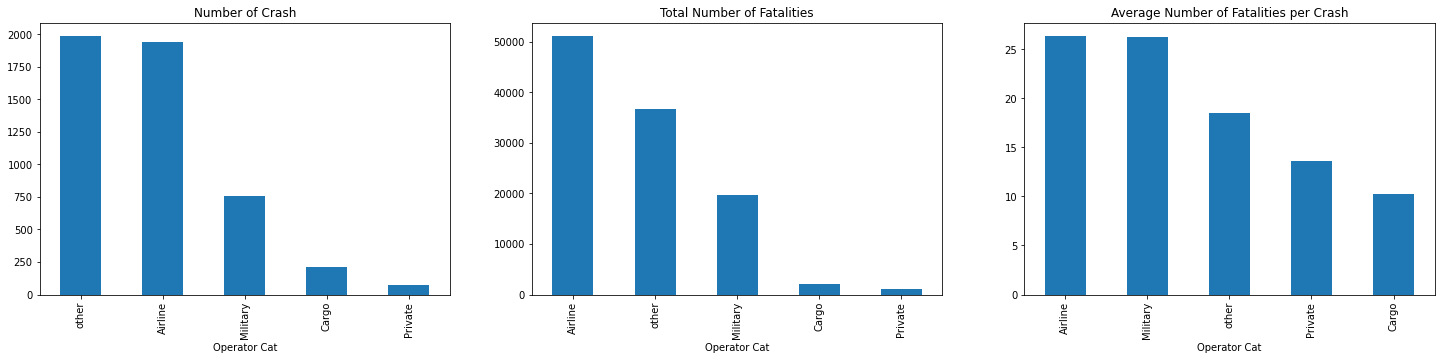

In [6]:
#Hint - first list all different types of operator using code below. Create bar chart for that  
operators_unique = df.Operator.unique()
operators = df.Operator.value_counts()
# print(operators)
#Add code here

import matplotlib.pyplot as plt

df["Operator Cat"] ="other"

OP_cats={"Military":["military","army","air force","airforce"],
         "Airline":["airline","air line","airway","aerolin","aero"],
         "Private":["private"],
         "Cargo":["fedex","cargo","service"]
         }

# an alternative approach is define sub-categories by continent. airlines with more than 10 instances are listed
# (AF: Africa) (AS: Asia) (EU: Europe) (US: United States) (AM: Rest of America) (OC: Oceania)
OP_cats_continent={"Military":["military","army","air force","airforce"],       
         "Airline_AF":["Ethiopian Airlines"],         
         "Airline_AS":["China National Aviation Corporation","Indian Airlines","Philippine Air Lines","Merpati Nusantara Airlines","Garuda Indonesia Airlines",
                         "Pakistan International Airlines","Burma Airways","China Airlines","Air Vietnam","Korean Airlines","Air India","United Arab Airlines"],         
         "Airline_EU":["Aeroflot","Air France","Deutsche Lufthansa","KLM Royal Dutch Airlines","British Overseas Airways","Sabena","Aeropostale","Imperial Airways",
                         "British European Airways","Ceskoslovenske Aerolinie","Iberia Airlines","LOT Polish Airlines","Swissair","Air Union","Tarom","Turkish Airlines",
                         "Balkan Bulgarian Airlines"],         
         "Airline_US":["United Air Lines","American Airlines","Pan American World Airways","Eastern Air Lines","Northwest Orient Airlines",
                         "Trans Continental and Western Air","Trans World Airlines","Delta Air Lines","Braniff Airlines"],         
         "Airline_AM":["AVIANCA","VASP","Varig","Mexicana","Cubana de Aviacion","Cruzeiro","Linea Aeropostal Venezolana","Aerolineas Argentinas",
                         "Panair do Brasil","Canadian Pacific Air Lines","Faucett","TACA","SATENA"],         
         "Airline_OC":["Qantas"],
         "Private":["Private"],
         "Cargo":["Flying Tiger Line","US Aerial Mail Service","fedex","cargo"]
         }

# to apply categories by continent
# OP_cats=OP_cats_continent

for op_cat in OP_cats:
  filter=df["Operator"].str.contains('|'.join(OP_cats[op_cat]),case=False,regex=True,na=False)
  df.loc[filter, "Operator Cat"] = op_cat

# to find uncategorized operators - comment bellow line after setting up all categories
# remainingdf=df[df["Operator Cat"]=='other']
# print(remainingdf.Operator.value_counts())
# remainingdf.to_csv('remainingdf.csv')

# to ignore uncategorized operators - but it overwrite the oroginal df. you may reload the entire dataset
# df=df[df["Operator Cat"]!='other']

fig, axs = plt.subplots(1,3,figsize=(25, 5))
df.groupby("Operator Cat").size().sort_values(ascending=False).plot(kind = "bar",ax=axs[0],title="Number of Crash")
df.groupby("Operator Cat")["Fatalities"].sum().sort_values(ascending=False).plot(kind = "bar",ax=axs[1],title="Total Number of Fatalities")
df.groupby("Operator Cat")["Fatalities"].mean().sort_values(ascending=False).plot(kind = "bar",ax=axs[2],title="Average Number of Fatalities per Crash")
plt.show()

###Task 1.2: Categorize by AC Type 
 * Define n categories (Boeing, Airbus, Antonov...etc)
    * Q1: How many planes crashed? (sum number of crashes)
    * Q2: How many fatalities?     (sum number of fatalities)
    * Hint: make a new column in the dataset
 * Produce bar chart
 * Comment on the results

 

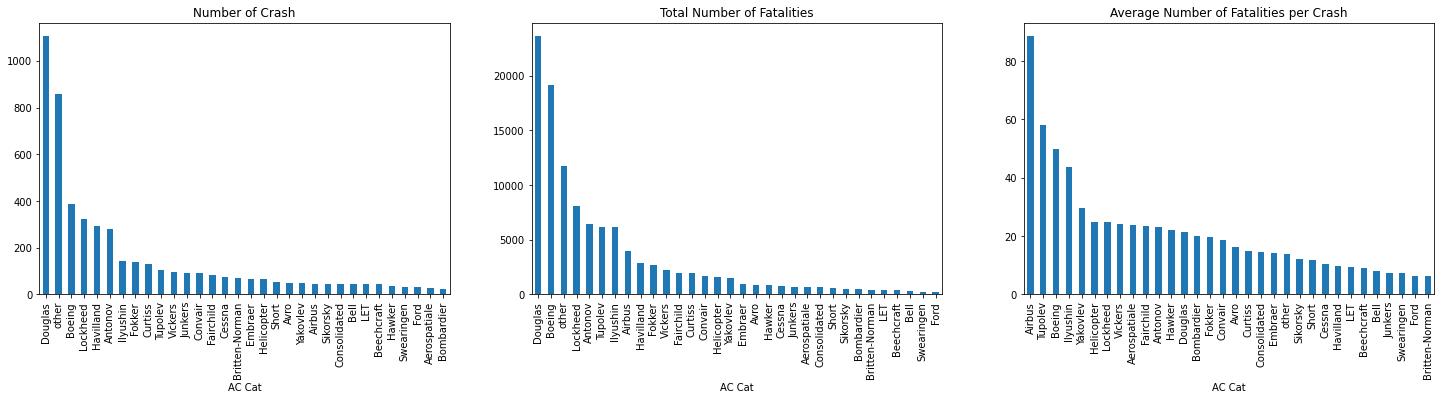

In [7]:
# Add code here
import matplotlib.pyplot as plt

df["AC Cat"] ="other"

# categories with more than 25 instances
AC_cats={"Fokker":["Fokker"],
         "Douglas":["Douglas"],
         "Boeing":["Boeing"],
         "Ford":["Ford"],
         "Lockheed":["Lockheed"],
         "Antonov":["Antonov"],
         "Airbus":["Airbus"],
         "Havilland":["Havilland"],
         "Yakovlev":["Yakovlev"],
         "Curtiss":["Curtiss"],
         "Junkers":["Junkers"],
         "Beechcraft":["Beechcraft"],
         "Tupolev":["Tupolev"],
         "Fairchild":["Fairchild"],
         "Vickers":["Vickers"],
         "Aerospatiale":["Aerospatiale"],
         "Avro":["Avro"],
         "Bell":["Bell"],
         "Cessna":["Cessna"],
         "Consolidated":["Consolidated"],
         "Convair":["Convair"],
         "Embraer":["Embraer","EMB"],
         "Ilyushin":["Ilyushin"],
         "Sikorsky":["Sikorsky"],
         "Britten-Norman":["Britten","Norman"],
         "Bombardier":["Bombardier","Canadair"],
         "Hawker":["Hawker"],
         "LET":["^let"],
         "Helicopter":["Helicopter"],
         "Short":["Short"],
         "Swearingen":["Swearingen"],
         }

for ac_cat in AC_cats:
  filter=df["AC Type"].str.contains('|'.join(AC_cats[ac_cat]),case=False,regex=True,na=False)
  df.loc[filter, "AC Cat"] = ac_cat

# to find uncategorized operators - comment bellow line after setting up all categories
# remainingdf=df[df["AC Cat"]=='other']
# print(remainingdf["AC Type"].value_counts())
# remainingdf.to_csv('remainingdf.csv')

# to ignore uncategorized operators - but it overwrite the oroginal df. you may reload the entire dataset
# df=df[df["AC Cat"]!='other']

fig, axs = plt.subplots(1,3,figsize=(25, 5))
df.groupby("AC Cat").size().sort_values(ascending=False).plot(kind = "bar",ax=axs[0],title="Number of Crash")
df.groupby("AC Cat")["Fatalities"].sum().sort_values(ascending=False).plot(kind = "bar",ax=axs[1],title="Total Number of Fatalities")
df.groupby("AC Cat")["Fatalities"].mean().sort_values(ascending=False).plot(kind = "bar",ax=axs[2],title="Average Number of Fatalities per Crash")
plt.show()

###Task 1.3: Categorize by Year and Time of the Day
* Use plots to visualize:
    1. plot year vs. number of chashes
    2. caterize time of failure into morning, afternoon, evening, and night based on "time".  
    * Hint: you will need to add a new column to the DB to create a new category
* plot bar or pie chart of number of crashes vs time of the day. 
* **Bonus** - Cross correlate year with type of aircraft. For example, the majority of crashes during WWII will be military. Can you identify and explain some other trends?

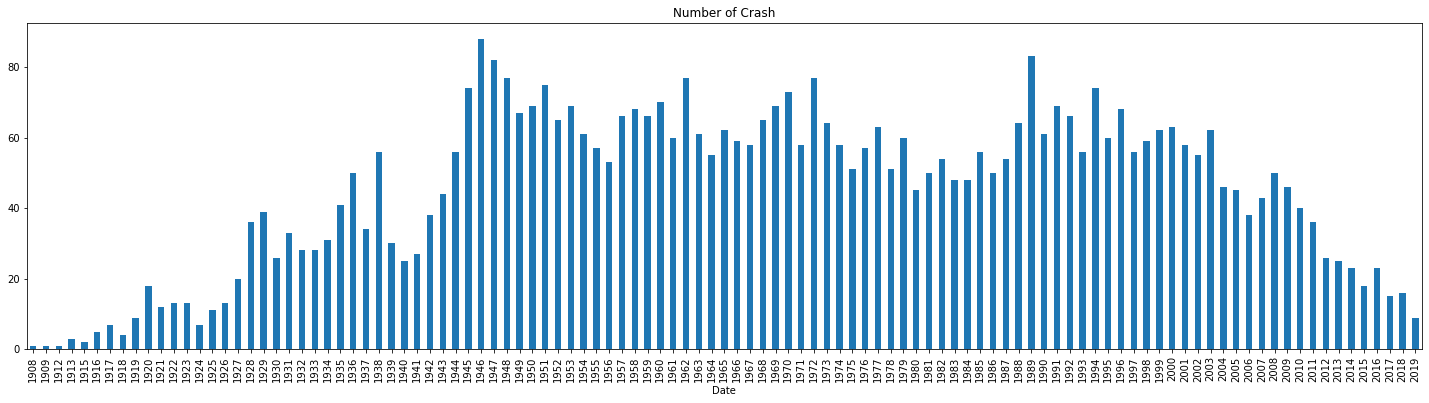

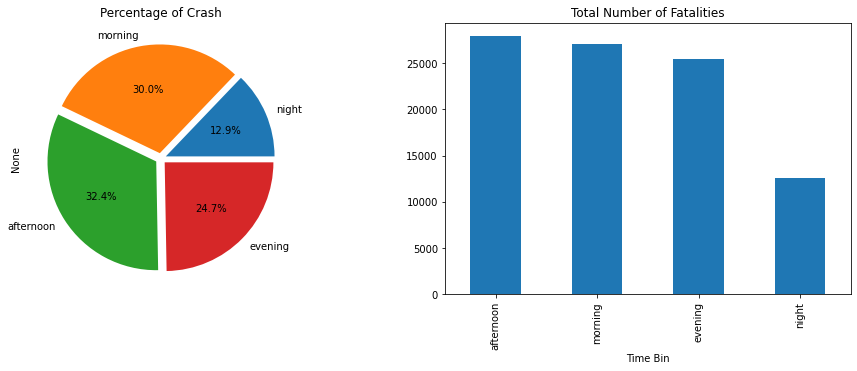

In [8]:
#Add code here
import matplotlib.pyplot as plt

year_serie=pd.to_datetime(df.Date).dt.year
df.groupby(year_serie).size().plot(kind = "bar",title="Number of Crash",figsize=(25, 6))
plt.show()

bins = [0,6,12,18,24]
labels = ['night','morning','afternoon','evening']
time_serie=pd.to_datetime(df.Time,errors='coerce').dt.hour
df["Time Bin"]=pd.cut(time_serie, bins, labels=labels, right=False)

fig, axs = plt.subplots(1,2,figsize=(16, 5))
df.groupby("Time Bin").size().plot(kind="pie",autopct='%0.1f%%',ax=axs[0],explode=(0.05,0.05, 0.05, 0.05),title="Percentage of Crash")
df.groupby("Time Bin")["Fatalities"].sum().sort_values(ascending=False).plot(kind="bar",ax=axs[1],title="Total Number of Fatalities")
plt.show()

###Task 1.4: Perform EDA 
* Read the Advanced exploratory data analysis (EDA) with Python: https://medium.com/p/536fa83c578a
* Apply EDA on your dataset.
  * What else does the EDA tell you about dataset?

Columns with most missing values:
           Number  Percent
Flight #  3652    73.53  
Time Bin  1520    30.60  
Time      1510    30.40  
Route     774     15.58  
cn/ln     668     13.45  


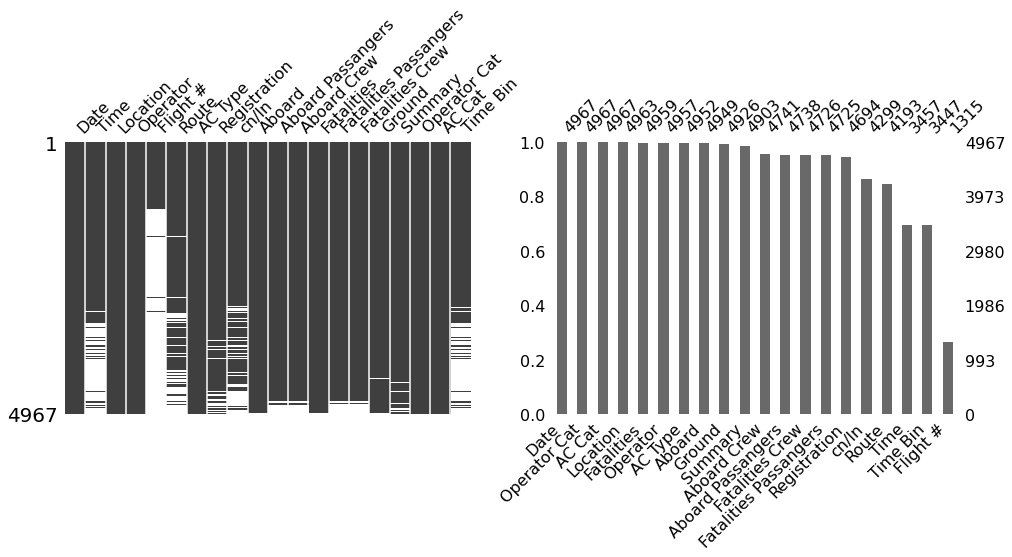

In [9]:
# add code here
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# Find missing values in columns
defective_columns=df.isna().sum().sort_values(ascending=False).to_frame(name="Number")
defective_columns["Percent"]=round(defective_columns["Number"]/df.shape[0]*100,2)
print("Columns with most missing values:\n",defective_columns.head(5))

fig, axs = plt.subplots(1,2,figsize=(16, 5))
msno.matrix(df, labels=True, sort="descending",ax=axs[0],figsize=(8, 8));
msno.bar(df, labels=True, sort="descending",ax=axs[1],figsize=(8, 8));
plt.show()

In [10]:
# Find missing values in Rows
# set a threshold to find defective rows
row_drop_thresh=round(df.shape[1] * 0.50)
n_bad_rows=sum(df.isna().sum(axis=1)>row_drop_thresh)
print(f"There are {n_bad_rows} rows with more than {row_drop_thresh} missing values")
# below code will also drop defective rows
# df = df.dropna(thresh=row_drop_thresh, axis=0).reset_index(drop=True)

There are 27 rows with more than 10 missing values


,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground
count,4949.000000,4738.000000,4741.000000,4959.000000,4725.000000,4726.000000,4926.000000
mean,31.088301,26.898691,4.479646,22.338173,19.017566,3.579348,1.728177
std,45.438282,44.010591,3.489021,35.026176,34.114849,3.170223,55.708966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000
max,644.000000,614.000000,61.000000,583.000000,560.000000,46.000000,2750.000000


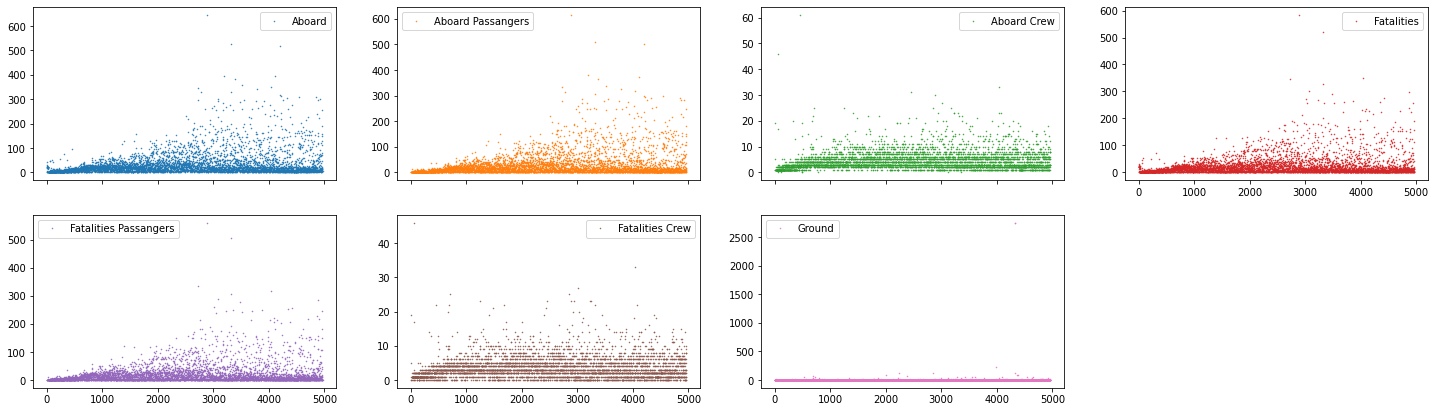

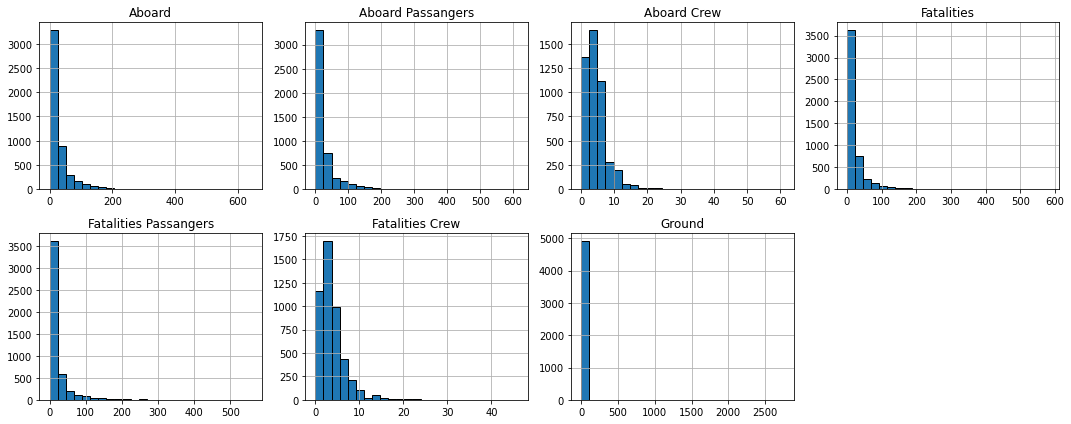

In [11]:
# investigating numeric features
# plot numerical features to find outliers or potential invalid data
df.plot(lw=0, marker=".", subplots=True, layout=(2, 4), figsize=(25, 7), markersize=1);

# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(15, 6), layout=(-1, 4), edgecolor="black")
plt.tight_layout();

df.describe(include="number")
# the only suspicious value is 2750 in ground column, by looking at data set we identify that it is related to 9/11 :(

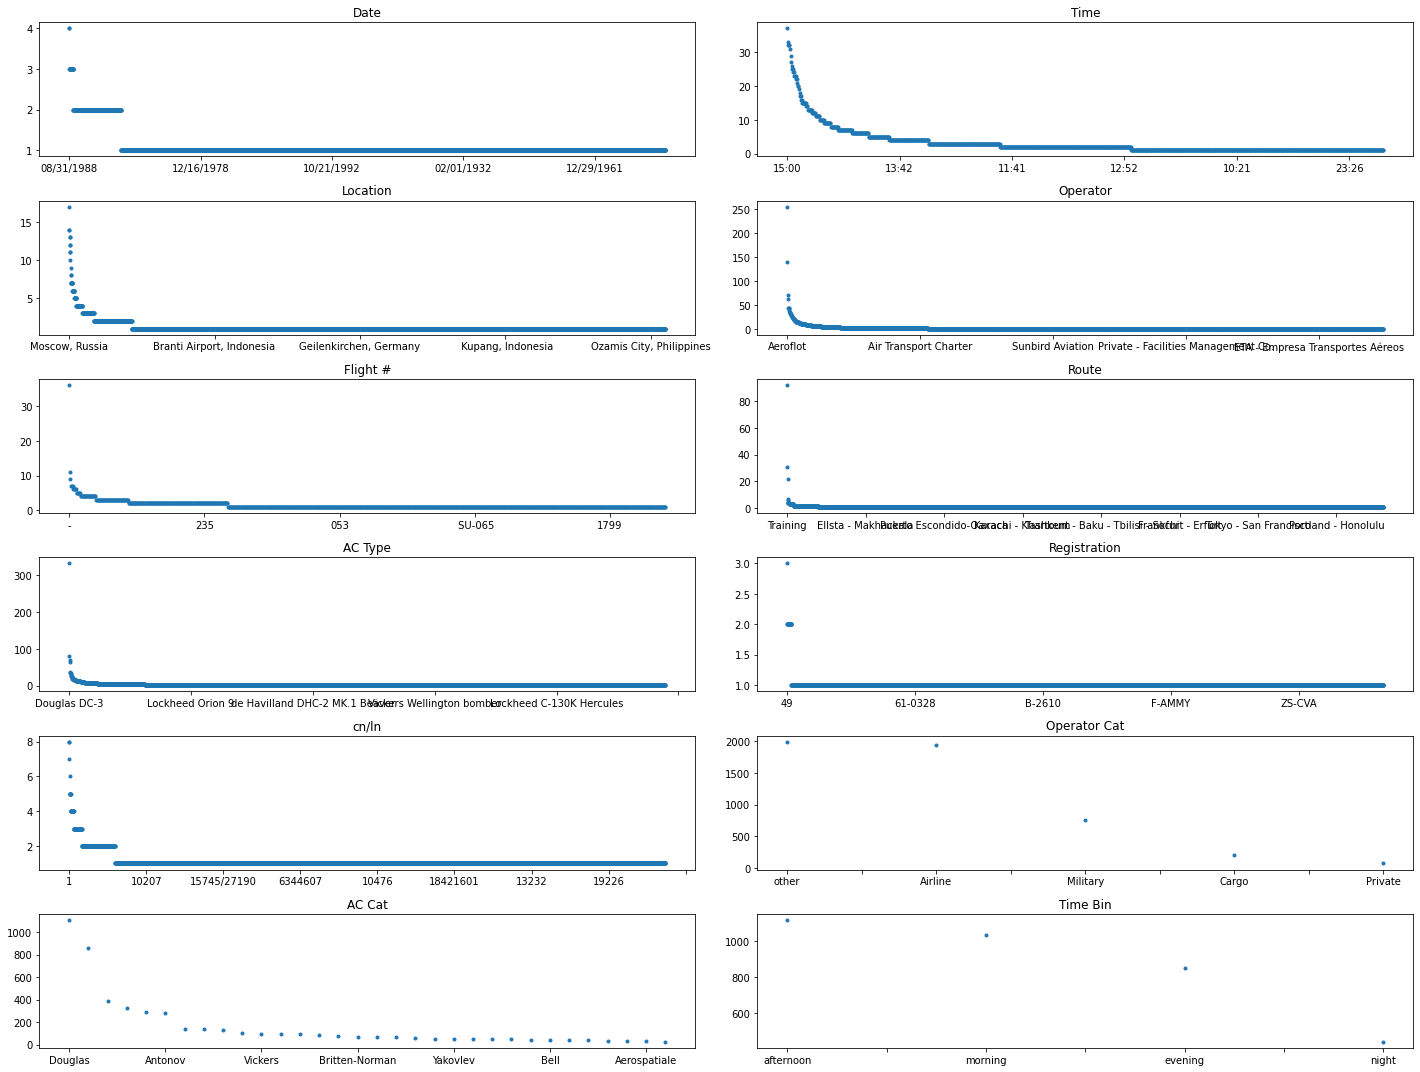

In [12]:
# Investigating non numeric features
# Create figure object with 12 subplots
fig, axes = plt.subplots(ncols=2, nrows=6, figsize=(20, 15))
df_non_numerical = df.select_dtypes(exclude="number").drop(columns="Summary")
for col, ax in zip(df_non_numerical.columns, axes.ravel()):
    df_non_numerical[col].value_counts().plot(title=col, lw=0, marker=".", ax=ax)
plt.tight_layout();

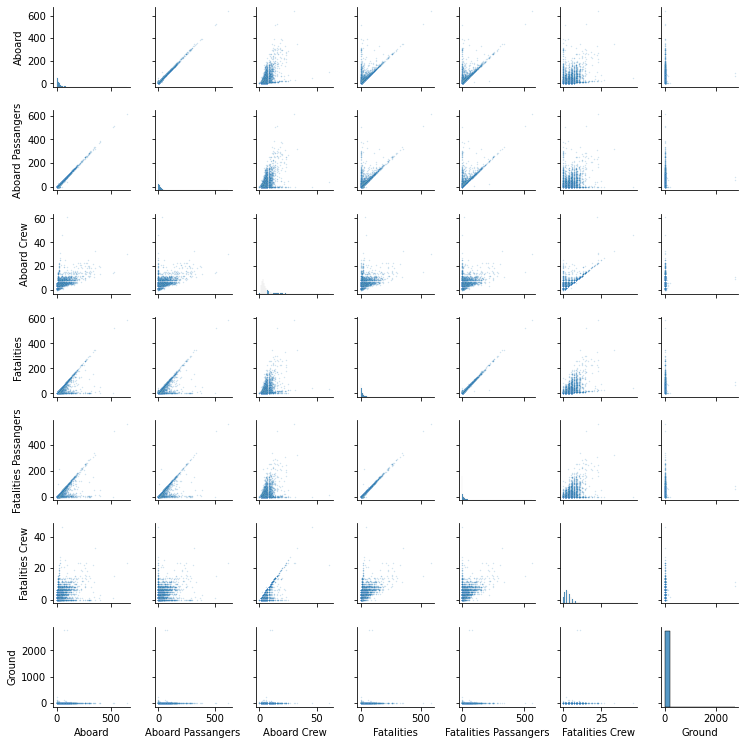

In [13]:
# Creates mask to identify numerical features with at least 15 unique features
cols_continuous = df.select_dtypes(include="number").nunique() >= 15

df_continuous = df[cols_continuous[cols_continuous].index]

sns.pairplot(df_continuous, height=1.5,plot_kws={"s": 2, "alpha": 0.2});

# it was predictable that there should be a meaningful relation between "Aboard Passengers" and "Fatalities Passenger"

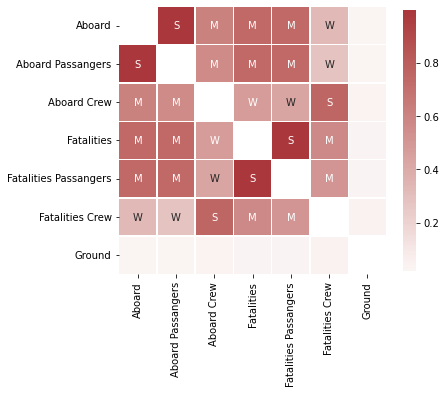

In [14]:
# Computes feature correlation
# Create a new dataframe which only contains the continuous features
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(6, 6))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

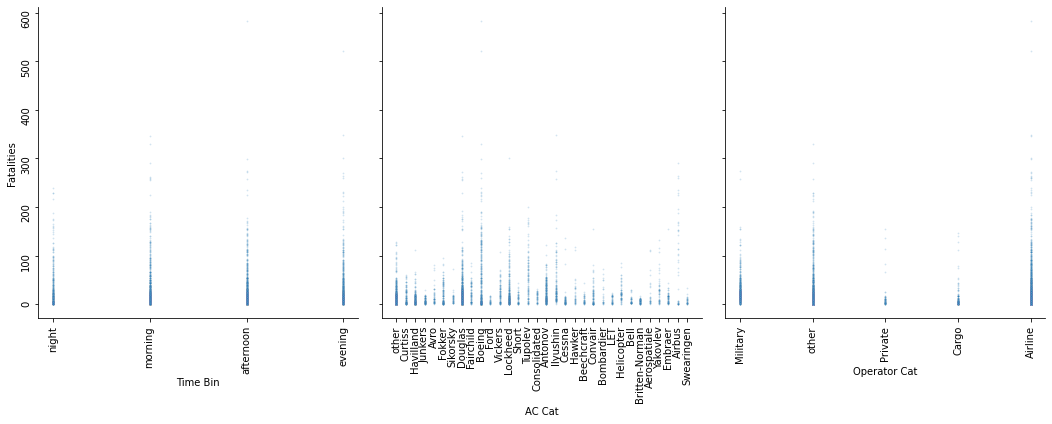

In [15]:
fig=sns.pairplot(df, plot_kws={"s": 3, "alpha": 0.2}, palette="Spectral",height=5,
    x_vars=["Time Bin", "AC Cat","Operator Cat"],
    y_vars="Fatalities");
for ax in fig.axes.flatten():
    ax.tick_params(rotation = 90)

## Task 2: Implement Text Search Analysis
* Implement a text search function that can search for key words in the "summary" and provide all instances that reference the words you are searching for. 
* List all aircraft that crashed due to: 
    1. weather (search by rain, storm..etc), 
    2. shot in combat (search shot)
    3. collision (search collide, collision...)
    4. approach/landing
* **Bonus**:
    * Think of your own categories. What would be useful and why? 
    * Correlate 2 or more keywords. 
* Discuss results, produce graphs or charts if nessary to support your discussion.

referenece: 
https://www.kaggle.com/del=3f79407a7fc1ab98/text-analysis-for-aircraft-crashes-causes/notebook

In [ ]:
#Add code here

## Task 3: Plot Crash on Map


### Task 3.1: Plot Location of the crash on the map
* Plot location of all crashes on the mapG
* Generate heat map based on frequency of crash occurances 
* Cluster area of high crash occurance and categorize them from highest to lowes
* Generate heat map based on the number of fatalities
  * How does it compare to the heat map in 2nd bullet? 
* **Bonus**: Think of your own idea and implement it. What would be useful to add to the map view and why?
* **Hint**: You will first need to convert the "Location" column to longitude and latitude coordinates. Feel free to use any library for this task. However, one way to do this is to use the "geopy" library. 
Note: Geopy does require you to create an account. 

In [ ]:
!pip install geopy

In [ ]:
!git clone https://github.com/DenisCarriere/geocoder
%cd geocoder


In [ ]:
!python setup.py install

In [ ]:
from geopy.geocoders import Nominatim

In [ ]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [ ]:
Latitude = "25.594095"
Longitude = "85.137566"
  
location = geolocator.reverse(Latitude+","+Longitude)
  
# Display
print(location)

Patna, Patna Rural, Patna District, Bihar, 800001, India


In [ ]:
from geopy.geocoders import Nominatim
location = geolocator.geocode("175 5th Avenue NYC")
print(location.address)
print((location.latitude, location.longitude))


Flatiron Building, 175, 5th Avenue, Manhattan Community Board 5, New York County, New York, 10010, United States
(40.741059199999995, -73.98964162240998)


In [ ]:
from geopy.geocoders import Nominatim
location = geolocator.geocode("Seattle, Washington")
print(location.address)
print((location.latitude, location.longitude))


Seattle, King County, Washington, United States
(47.6038321, -122.3300624)


In [ ]:
print(df.location[1])

NameError: ignored

In [ ]:
# add code here

###Task 3.2: Plot Trajectories/Routes on Map
* Plot trajectories and routes
* Annotate with the AC registration 
* **Bonus**: Make it selectable such that you can pick such that the use can pick: date range, AC type, operator, registration

Note: If you cannot do it for the entire dataset. Choose a smaller subset.

In [ ]:
# add code here

###Task 3.3: Correlation Location and Weather 
* For each region identify what the key weather words are. 
* Are there some areas that have more crashses due to weather? 
* Can you identify what type of weather? (rain, winds...etc).
* Create confusion matrix (x-weather and y-location)
* **Bonus**: Correlate location with other "key words" (i.e. departure, pilot error..etc)

Note: this part requires combining task 2 and task 3

## Task 4: Implement K-means Clustering 

The purpose of this task is to implement k-means clustering to identify correlations between different parameters identified in the previous tasks (heat map).

###Task 4.1: K-means clustering
* Apply k-means to different groups of data to identify correlations.
* Test different k values
  * Is there an obvios best k?

Reference: 
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

### Task 4.2: K-means Optimization 
* Apply K-means optimization to find the best k-value using 2 different methods: 
  * Elbow method
  * Silhuette method
* Discuss result
  * Which method is better and why?